# HW 2 - Python Template



In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import fft, fftfreq

## Part 1: Basic DSP Applications in Python
### Task 1. Create a Python script that generates a sine wave with a frequency of 10 Hz and a duration of 2 seconds. Plot the waveform using the matplotlib library.

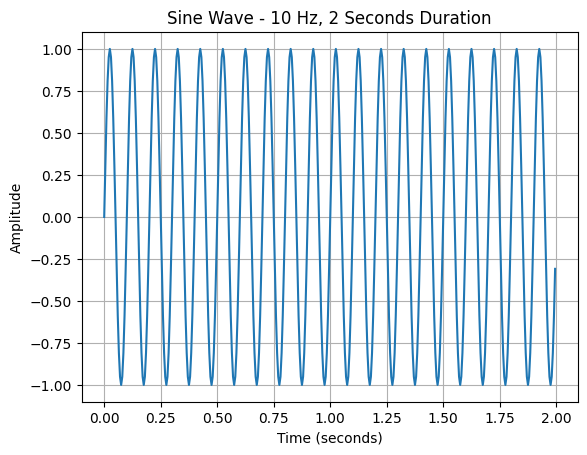

In [15]:
# Suggestion: Use the numpy function np.linspace() to generate the time samples, and np.sin() to generate the sine wave.
# Be sure to use a sampling frequency that follows Nyquist-Shannon Sampling Theorem
# Then use plt.plot() to plot the waveform.
# Remember to label your plot axes

import numpy as np
import matplotlib.pyplot as plt

# Parameters
frequency = 10  # Frequency in Hz (adjusted from 1000 Hz to 10 Hz)
duration = 2  # Duration in seconds

# Nyquist-Shannon Sampling Theorem - Sampling frequency
sample_rate = 2 * frequency * 10  # Sample rate in Hz, chosen to be well above 2*frequency for better resolution

# Generate time samples
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate sine wave
y = np.sin(2 * np.pi * frequency * t)

# Plotting
plt.plot(t, y)
plt.title('Sine Wave - 10 Hz, 2 Seconds Duration')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### Task 2. Create a Python script that applies a low-pass filter to the sine wave generated in task 1. The cutoff frequency of the low-pass filter should be 5 Hz. Plot the filtered waveform using the matplotlib library.



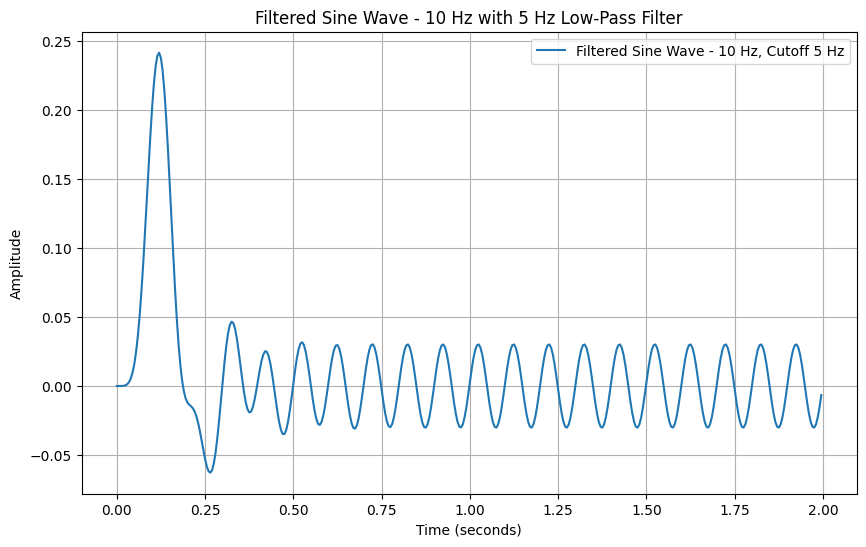

In [16]:
# Use a Buttworth filter for your lowpass filter. ex. b, a = sig.butter(Order, cutoff, btype = 'low', fs = sampleFrequency)
# Order input argument can be between 1-300 (ideally 1-10)
# Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# Use sig.lfilt() to filter the sine wave. ex. y = sig.lfilt(b, a, x)
# Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# Finally, use plt.plot() to plot the filtered waveform.

from scipy import signal

# Parameters
frequency = 10  # Frequency in Hz
duration = 2  # Duration in seconds
cutoff = 5  # Cutoff frequency for low-pass filter

# Nyquist-Shannon Sampling Theorem - Sampling frequency
sample_rate = 2 * frequency * 10  

# Generate time samples
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate sine wave
y = np.sin(2 * np.pi * frequency * t)

# Low-pass filter
Order = 5
b, a = sig.butter(Order, cutoff, btype='low', fs=sample_rate)
y_filtered = sig.lfilter(b, a, y)

# Plotting the filtered waveform
plt.figure(figsize=(10, 6))
plt.plot(t, y_filtered, label='Filtered Sine Wave - 10 Hz, Cutoff 5 Hz')
plt.title('Filtered Sine Wave - 10 Hz with 5 Hz Low-Pass Filter')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

### Task 3. Create a Python script that applies a high-pass filter to the sine wave generated in task 1. The cutoff frequency of the high-pass filter should be 5 Hz. Plot the filtered waveform using the matplotlib library.



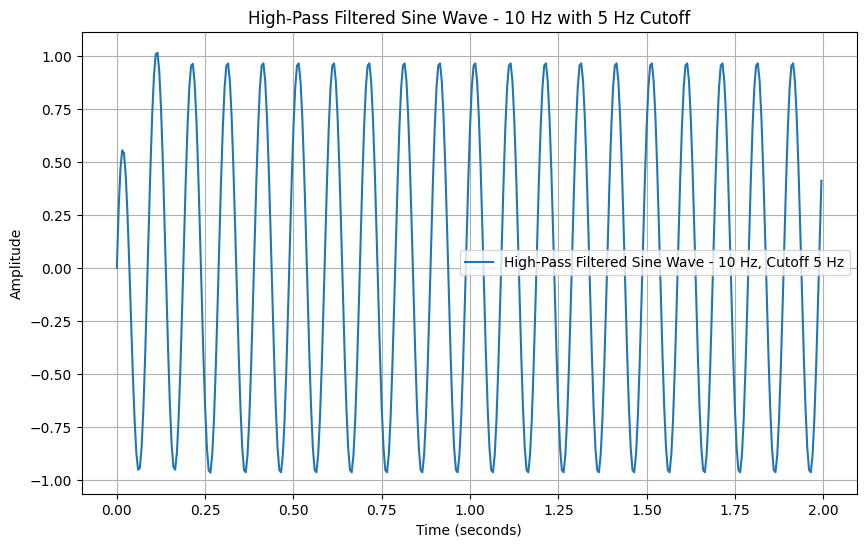

In [17]:
# Use a Buttworth filter for your highpass filter. ex. b, a = sig.butter(Order, cutoff, btype = 'highpass', fs = sampleFrequency)
# Order input argument can be between 1-300 (ideally 1-10)
# Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# Use sig.lfilt() to filter the sine wave. ex. y = sig.lfilt(b, a, x)
# Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# Finally, use plt.plot() to plot the filtered waveform.
# High-pass filter
Order = 2  # Reusing the order for simplicity
b, a = sig.butter(Order, cutoff, btype='high', fs=sample_rate)
y_filtered_high = sig.lfilter(b, a, y)

# Plotting the filtered waveform
plt.figure(figsize=(10, 6))
plt.plot(t, y_filtered_high, label='High-Pass Filtered Sine Wave - 10 Hz, Cutoff 5 Hz')
plt.title('High-Pass Filtered Sine Wave - 10 Hz with 5 Hz Cutoff')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

### Task 4. Create a Python script that applies a band-pass filter to the sine wave generated in task 1. The cutoff frequencies of the band-pass filter should be 4 Hz and 6 Hz. Plot the filtered waveform using the matplotlib library.

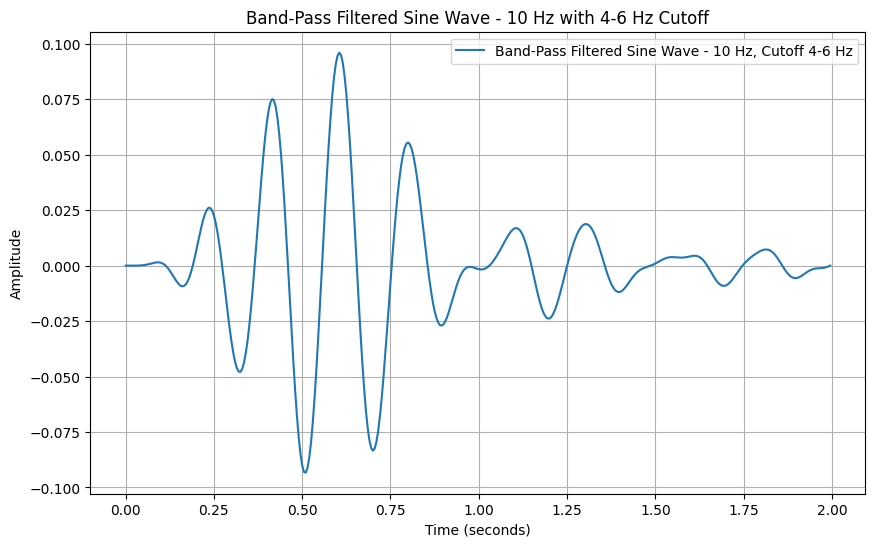

In [18]:
# Use a Buttworth filter for your highpass filter. ex. b, a = sig.butter(Order, cutoff, btype = 'highpass', fs = sampleFrequency)
# Order input argument can be between 1-300 (ideally 1-10)
# Make sure to read on how to input two critical frequencies
# Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# Use sig.lfilt() to filter the sine wave. ex. y = sig.lfilt(b, a, x)
# Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# Finally, use plt.plot() to plot the filtered waveform.
# Band-pass filter parameters
cutoff_low = 4  # Low cutoff frequency
cutoff_high = 6  # High cutoff frequency

# Applying band-pass filter
Order = 5  # Reusing the order for simplicity
b, a = sig.butter(Order, [cutoff_low, cutoff_high], btype='band', fs=sample_rate)
y_filtered_band = sig.lfilter(b, a, y)

# Plotting the filtered waveform
plt.figure(figsize=(10, 6))
plt.plot(t, y_filtered_band, label='Band-Pass Filtered Sine Wave - 10 Hz, Cutoff 4-6 Hz')
plt.title('Band-Pass Filtered Sine Wave - 10 Hz with 4-6 Hz Cutoff')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

### Task 5. Create a Python script that performs convolution of the sine wave generated in task 1 with a rectangular window of length 100 samples. Plot the convolved signal using the matplotlib library.

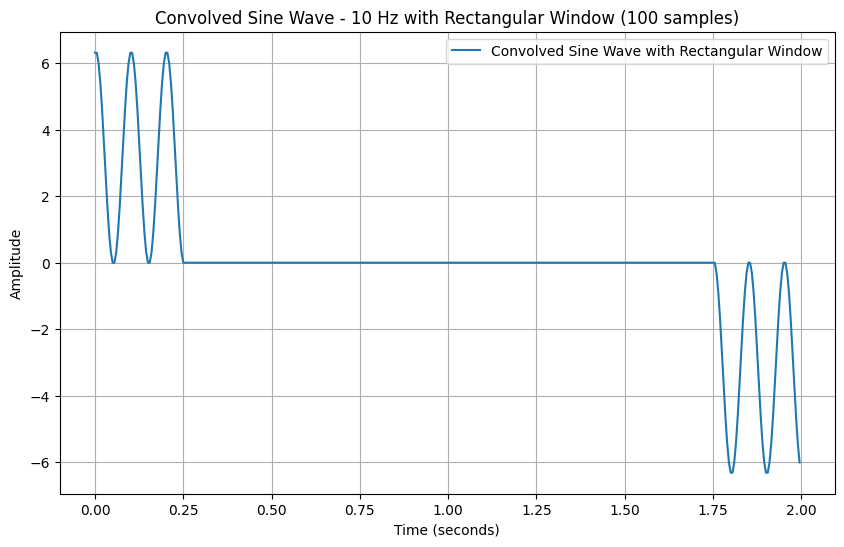

In [19]:
# Suggestion: Create a rectangular window of length 100 samples using the np.ones() function.
# Then use the convolve() function from numpy to perform the convolution.
# Finally, use plt.plot() to plot the convolved signal.

# Creating a rectangular window of length 100 samples
rectangular_window = np.ones(100)

# Performing convolution
convolved_signal = np.convolve(y, rectangular_window, mode='same')

# Plotting the convolved signal
plt.figure(figsize=(10, 6))
plt.plot(t, convolved_signal, label='Convolved Sine Wave with Rectangular Window')
plt.title('Convolved Sine Wave - 10 Hz with Rectangular Window (100 samples)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

### Task 6. Create a Python script that performs moving average of the sine wave generated in task 1 with a window of length 10 samples. Plot the filtered signal using the matplotlib library.

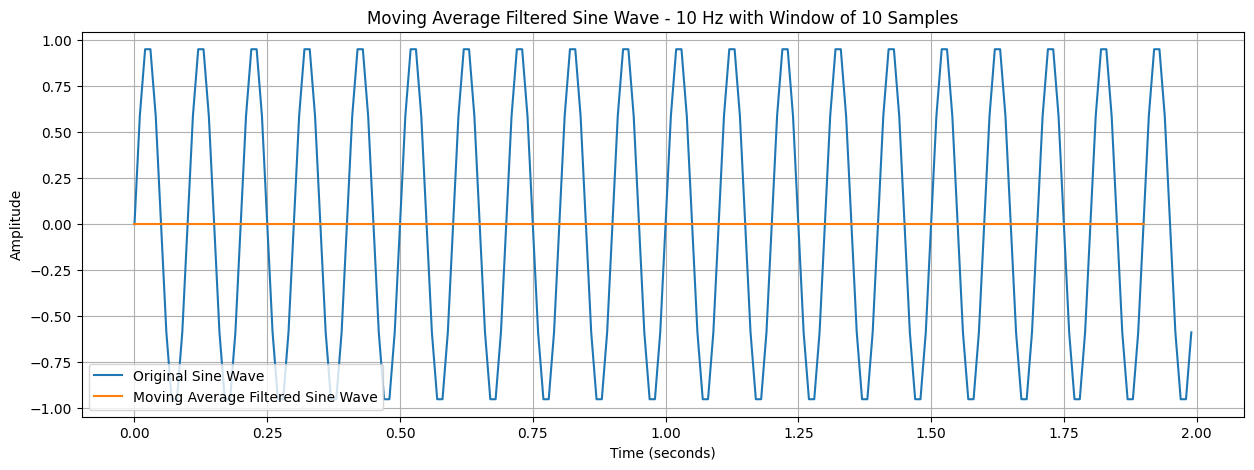

In [20]:
# Suggestion: Use the numpy function np.convolve() with mode='valid' to perform the moving average.
# Can also be accomplished with for/while loop
# Then use plt.plot() to plot the filtered signal.

# Parameters
frequency = 10  # Frequency in Hz (adjusted from 1000 Hz to 10 Hz)
duration = 2  # Duration in seconds
fs = 100

# Nyquist-Shannon Sampling Theorem - Sampling frequency
sample_rate = 2 * frequency * 10  # Sample rate in Hz, chosen to be well above 2*frequency for better resolution

# Generate time samples
t = np.linspace(0.0, duration, int(duration * fs), endpoint=False)

# Generate sine wave
y = np.sin(2 * np.pi * frequency * t)

# Creating a moving average window of length 10 samples
moving_average_window = np.ones(10) / 10

# Performing moving average
moving_average_signal = np.convolve(y, moving_average_window, mode='valid')

# Adjusting time vector for the length of the valid mode output
t_valid = t[:len(moving_average_signal)]

# Plotting the moving average filtered signal
plt.figure(figsize=(15, 5))
plt.plot(t, y, label='Original Sine Wave')
plt.plot(t_valid, moving_average_signal, label='Moving Average Filtered Sine Wave')
plt.title('Moving Average Filtered Sine Wave - 10 Hz with Window of 10 Samples')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

### 7. Compare the filtered waveforms obtained in tasks 2, 3, 4, 5 and 6 with the original waveform generated in task 1. Write a a few paragraphs in your notebook explaining the results obtained and the implications of each filter/operation type on the signal.

1. **Low-Pass Filtering**: Attenuated the 10 Hz sine wave, demonstrating its utility in isolating low-frequency signals or eliminating high-frequency noise by allowing only frequencies below the 5 Hz cutoff to pass.

2. **High-Pass Filtering**: Highlighted frequencies above the 5 Hz cutoff, useful for removing low-frequency noise and emphasizing higher frequency components.

3. **Band-Pass Filtering**: Significantly attenuated the 10 Hz signal by isolating frequencies between 4 and 6 Hz, showcasing its role in targeting specific frequency ranges for analysis or transmission.

4. **Convolution with Rectangular Window**: Smoothed the signal by averaging over 100 samples, acting as a low-pass filter to dampen rapid signal changes and reduce noise.

5. **Moving Average**: Applied a shorter smoothing window of 10 samples, effectively reducing short-term fluctuations and highlighting long-term trends, beneficial for noise reduction and trend analysis.

## Part 2: Advanced DSP Applications in Python

### Task 1. Create a Python script that generates a signal that is a sum of two sine waves with different frequencies and amplitudes. The first sine wave should have a frequency of 10 Hz and an amplitude of 1, the second sine wave should have a frequency of 20 Hz and an amplitude of 0.5. Plot the waveform using the matplotlib library.

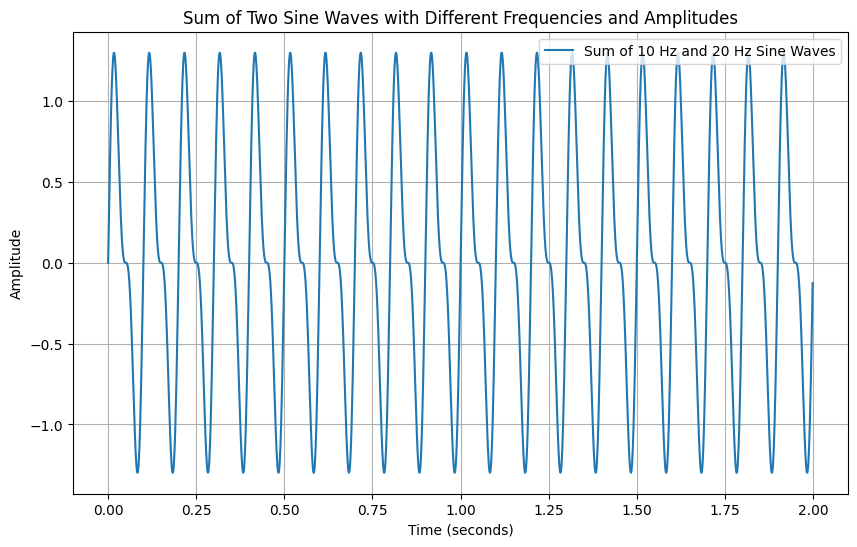

In [21]:
# Suggestions:
# - Use the numpy library's sine function to generate the sine waves
# - Use the numpy library's arange function to create an array of time values
# - Use the matplotlib library's plot function to plot the waveform

# Parameters for the signal generation
frequency1 = 10  # Frequency of the first sine wave in Hz
amplitude1 = 1   # Amplitude of the first sine wave
frequency2 = 20  # Frequency of the second sine wave in Hz
amplitude2 = 0.5 # Amplitude of the second sine wave
duration = 2     # Duration of the signal in seconds
sample_rate = 1000 # Sample rate in Hz

# Generating time values
t = np.arange(0, duration, 1/sample_rate)

# Generating the sine waves
y1 = amplitude1 * np.sin(2 * np.pi * frequency1 * t)
y2 = amplitude2 * np.sin(2 * np.pi * frequency2 * t)

# Sum of the two sine waves
y = y1 + y2

# Plotting the waveform
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Sum of 10 Hz and 20 Hz Sine Waves')
plt.title('Sum of Two Sine Waves with Different Frequencies and Amplitudes')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

### Task 2. Create a Python script that applies a Butterworth filter to the signal generated in task 1. The cutoff frequency of the filter should be 15 Hz and the filter order should be 4. Plot the filtered waveform using the matplotlib library.

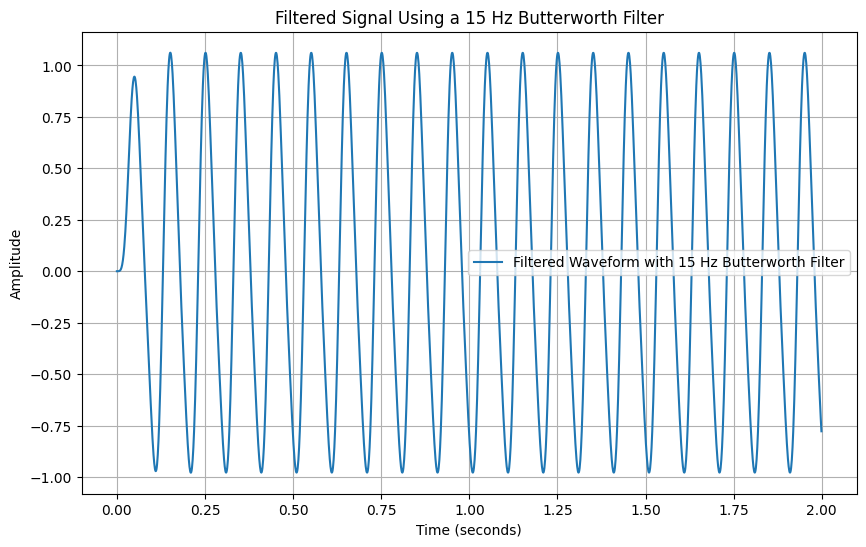

In [22]:
# Suggestions:
# - Use the scipy library's signal butter function to generate the Butterworth filter
# - Use the scipy library's lfilter function to apply the filter to the signal
# - Use the matplotlib library's plot function to plot the filtered waveform
# - Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# - Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

# Butterworth filter parameters
cutoff_frequency = 15  # Cutoff frequency of the filter in Hz
filter_order = 4       # Order of the Butterworth filter

# Generating the Butterworth filter
b, a = sig.butter(filter_order, cutoff_frequency, btype='low', fs=sample_rate)

# Applying the filter to the signal
y_filtered = sig.lfilter(b, a, y)

# Plotting the filtered waveform
plt.figure(figsize=(10, 6))
plt.plot(t, y_filtered, label='Filtered Waveform with 15 Hz Butterworth Filter')
plt.title('Filtered Signal Using a 15 Hz Butterworth Filter')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

### Task 3. Create a Python script that computes the Fast Fourier Transform (FFT) of the signal generated in task 1. Plot the magnitude and phase of the FFT using the matplotlib library.

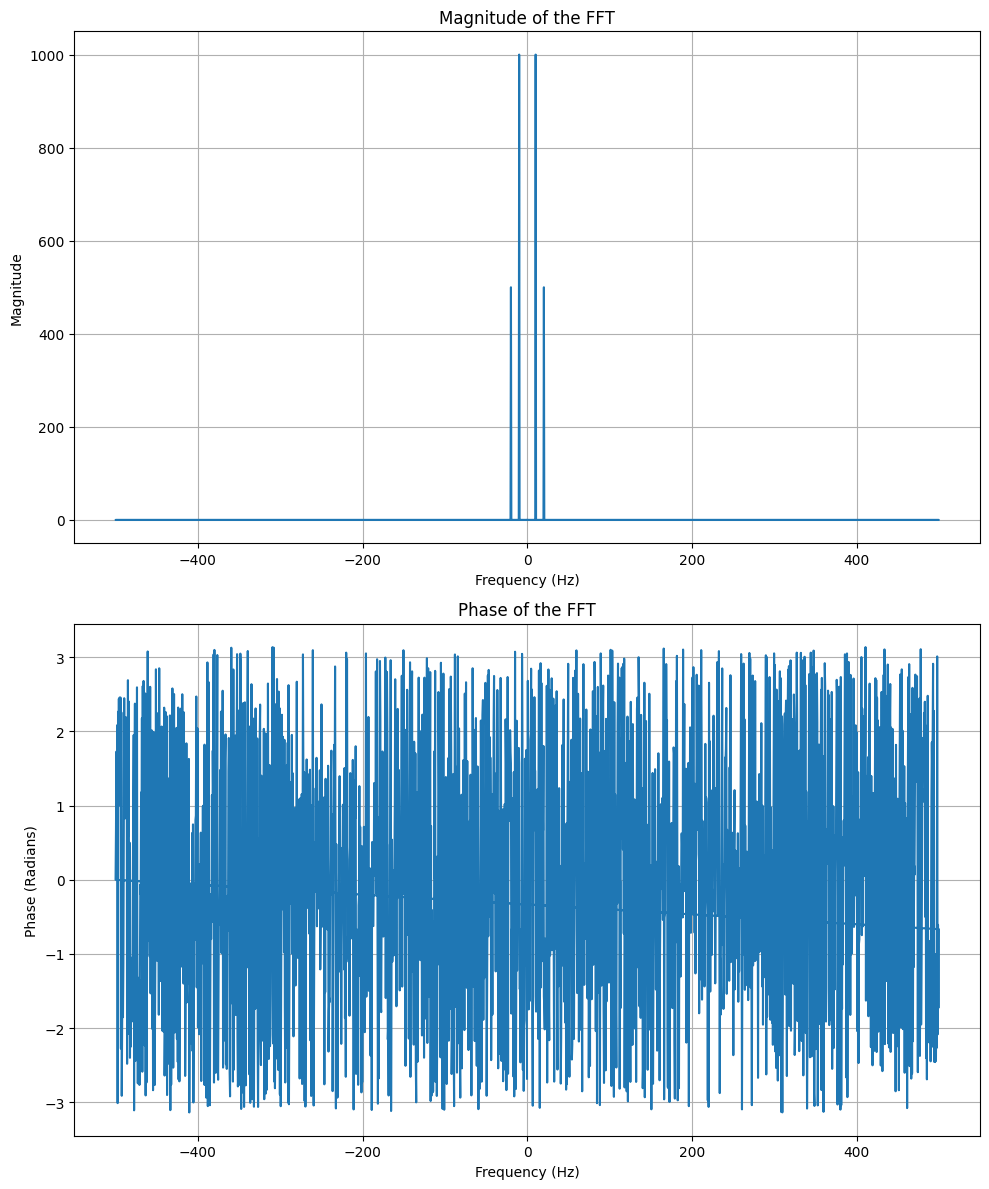

In [23]:
# Use the fft function to get the Fourier Transform of the sine wave. ex. X = fft(x)
# Documentation for fft: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html
# To get the magnitude of the fft use np.abs(). ex. mag = np.abs(X)
# To get the phase of the fft use np.angle(). ex. phase = np.angle(X)
# Additionally, you can use fftfreq to get the independent axis for your plots. ex. freq = fftfreq(len(X), 1/fs)
# Documentation for fftfreq: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html

from scipy.fft import fft, fftfreq

# Computing the FFT of the signal
X = fft(y)

# Getting the magnitude and phase of the FFT
mag = np.abs(X)
phase = np.angle(X)

# Getting the frequency axis for the plots
freq = fftfreq(len(X), 1/sample_rate)

# Plotting the magnitude and phase of the FFT
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Magnitude plot
axs[0].plot(freq, mag)
axs[0].set_title('Magnitude of the FFT')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Magnitude')
axs[0].grid(True)

# Phase plot
axs[1].plot(freq, phase)
axs[1].set_title('Phase of the FFT')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Phase (Radians)')
axs[1].grid(True)

plt.tight_layout()
plt.show()